# Dataset Used
### car price prediction
<a href='https://www.kaggle.com/datasets/hellbuoy/car-price-prediction' >Download from here</a>

# Downloading Dataset

In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/hellbuoy/car-price-prediction')

Skipping, found downloaded files in ".\car-price-prediction" (use force=True to force download)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('car-price-prediction/CarPrice_Assignment.csv',index_col='car_ID')

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 25)

# Data Cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
def make_car_name(obj):
    val = obj.split(' ')
    return val[0]

In [10]:
df['CarName']=df['CarName'].apply(make_car_name)

In [11]:
def replace(a,b):
    df["CarName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')
replace('nissan','Nissan')

In [12]:
df['stroke'].head()

car_ID
1    2.68
2    2.68
3    3.47
4    3.40
5    3.40
Name: stroke, dtype: float64

# Performinf EDA

### EDA on Categorical features

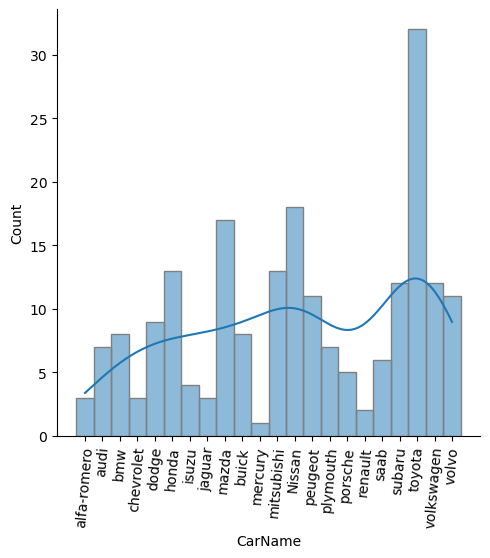

In [13]:
sns.displot(df['CarName'],kde=True,edgecolor='gray')
plt.xticks(rotation=85)
plt.show()

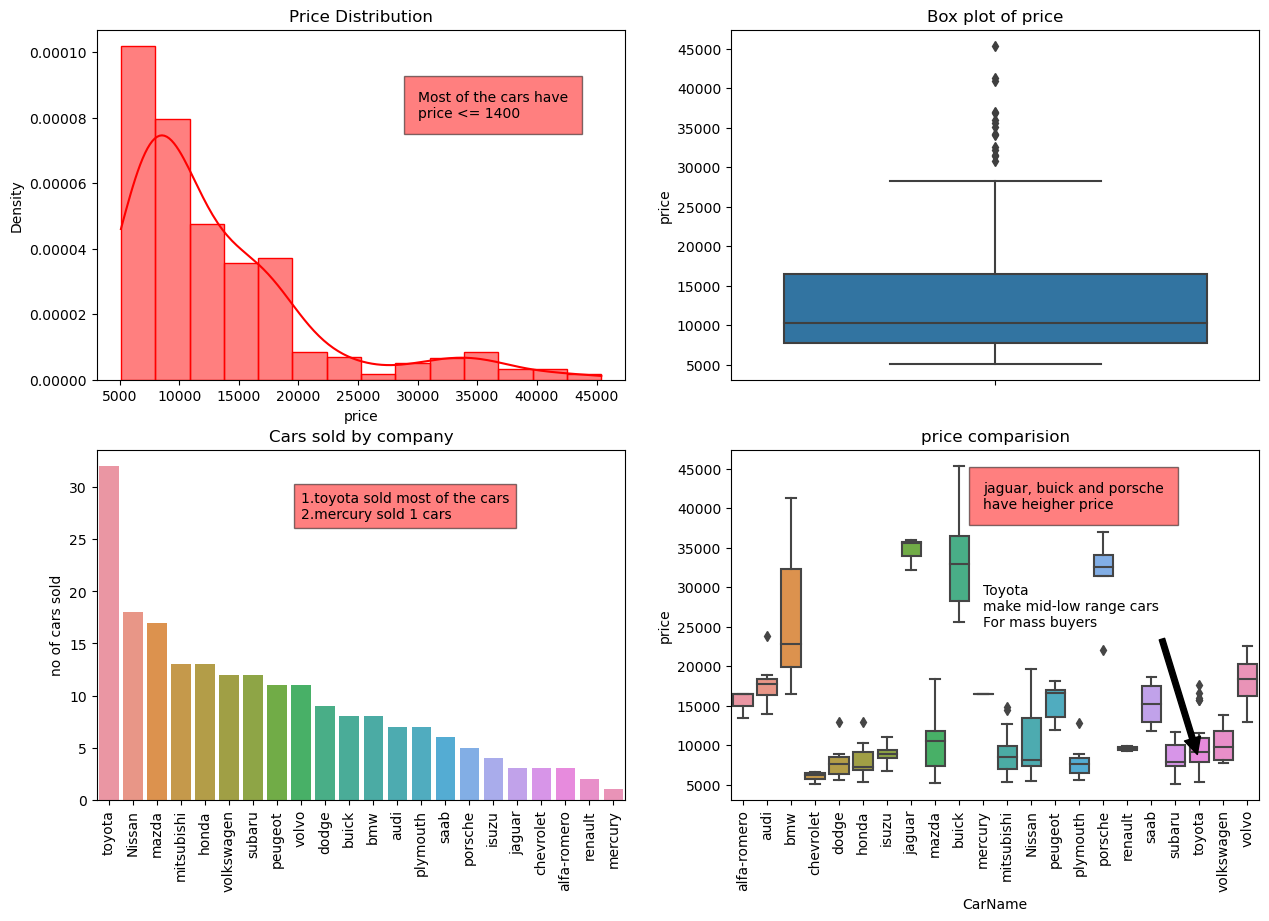

In [14]:


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data = df['price'],kde=True,edgecolor='red',color='red', stat='density')
tx='Most of the cars have\nprice <= 1400'
plt.text(30000,0.00008, tx ,bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.title('Price Distribution')

plt.subplot(2,2,2)
sns.boxplot(y=df['price'])
plt.title('Box plot of price')

plt.subplot(2,2,3)
sns.barplot(x = df['CarName'].value_counts().index , y = df['CarName'].value_counts().values)
plt.ylabel('no of cars sold')
plt.title('Cars sold by company')
tx='1.toyota sold most of the cars\n2.mercury sold 1 cars'
plt.text(8,27, tx ,bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x='CarName',y='price',data=df)
plt.title('price comparision')
plt.xticks(rotation=90)
tx='jaguar, buick and porsche\nhave heigher price'
plt.text(10,40000, tx ,bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.annotate('Toyota\nmake mid-low range cars\nFor mass buyers', xy=(19, 8000), xytext=(10, 25000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


<b>Insight and Observations</b><br>
Toyota makes low-mid price cars <br>
Their targate audience is mass buyers <br>
Toyota is the Company which sell most of the car in Third plot  <br> 
Companies like Mercury and Renault have very less data so it is very hard to predict price

 ### Visualizinf change in price on the basis of fueltype and aspiration

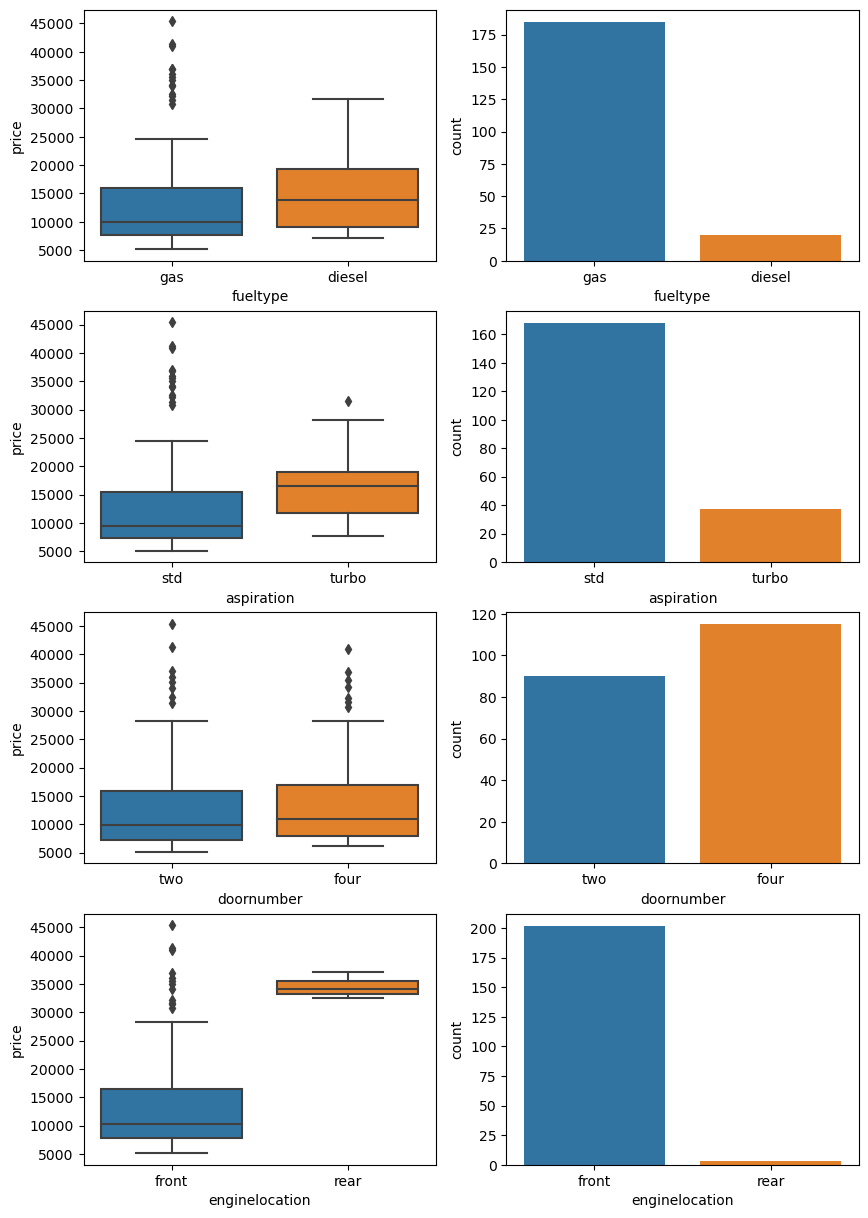

In [15]:
row=4
col=2

plt.figure(figsize=(10,15))
plt.subplot(row,col,1)
sns.boxplot(x='fueltype',y='price',data = df)

plt.subplot(row,col,2)
sns.countplot(x='fueltype',data=df)

plt.subplot(row,col,3)
sns.boxplot(x='aspiration',y='price',data = df)

plt.subplot(row,col,4)
sns.countplot(x='aspiration',data=df)

plt.subplot(row,col,5)
sns.boxplot(x='doornumber',y='price',data = df)

plt.subplot(row,col,6)
sns.countplot(x='doornumber',data=df)

plt.subplot(row,col,7)
sns.boxplot(x='enginelocation',y='price',data = df)

plt.subplot(row,col,8)
sns.countplot(x='enginelocation',data=df)
plt.show()


<b>Insight and Observations</b><br>
1.Customer prefer gas car over diesel car<br>
2.Diesel cars have heigher price as compared to gas cars<br>
3.Customer tends to buy a car which consumes affordable fule<br>
4.Same goes to aspiration<br>
5.Outliers in fueltype and aspiration plots shows that some cars with std aspiration are expensive too and same story with gas<br>

 ### Visualizinf change in price on the basis of carbody

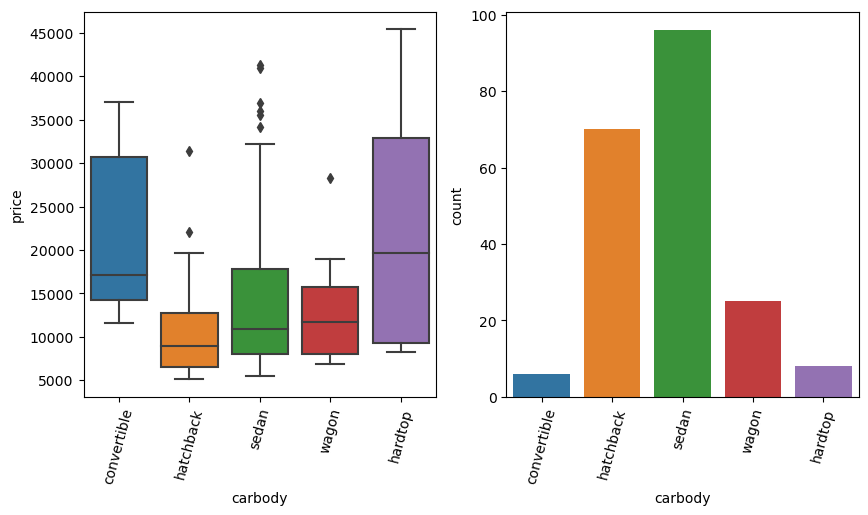

In [16]:
row=1
col=2
plt.figure(figsize=(10,5))
plt.subplot(row,col,1)
sns.boxplot(x='carbody',y='price',data=df)
plt.xticks(rotation=75)

plt.subplot(row,col,2)
sns.countplot(x='carbody',data=df)
plt.xticks(rotation=75)

plt.show()

<b>Insight and Observations</b><br>
1.sedans and hatchback are most selling because they have lower price as compare to convertiable and hardtop<br>
2.convertiable and hardtop are expensive <br>
3.In sedan sagement there are outliers(some models of sedans are expensive)

 ### Visualizinf change in price on the basis of drivewheel and enginelocation


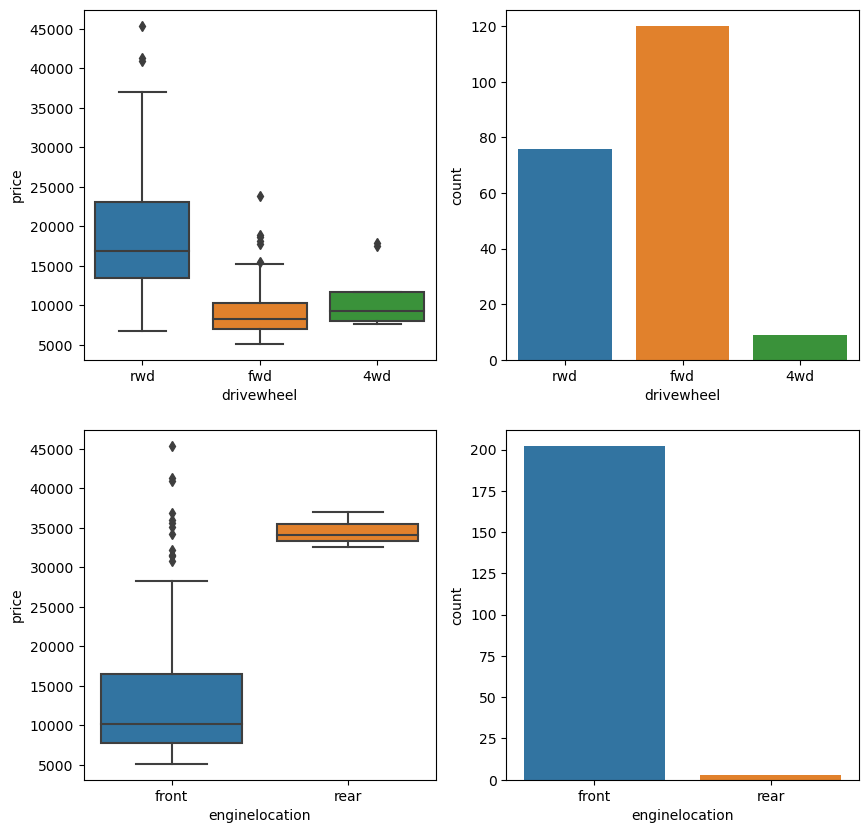

In [17]:
row=2
col=2
plt.figure(figsize=(10,10))
plt.subplot(row,col,1)
sns.boxplot(x='drivewheel',y='price',data=df)

plt.subplot(row,col,2)
sns.countplot(x='drivewheel',data=df)

plt.subplot(row,col,3)
sns.boxplot(x='enginelocation',y='price',data=df)

plt.subplot(row,col,4)
sns.countplot(x='enginelocation',data=df)


plt.show()

<b>Insight and Observations</b><br>
1.Customer buy fwd(front wheel drive) more because they have lower price<br>
<span style='color:green'>2.Followed by rwd They are expensive compared to fwd and 4wd still people buy because 4wd less fuel economy(assumption)</span><br>
3.Customer buy car with front engine because they are very affordable as compared to rear engine

 ### Visualizinf change in price on the basis of fuelsystem


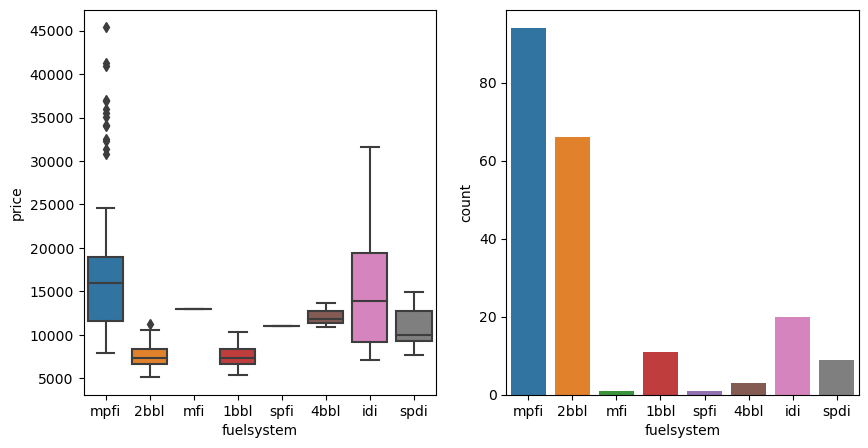

In [18]:
plt.figure(figsize=(10,5))
row,col=1,2
plt.subplot(row,col,1)
sns.boxplot(x='fuelsystem',y='price',data=df)

plt.subplot(row,col,2)
sns.countplot(x='fuelsystem',data=df)

plt.show()

### Visualizinf change in price on the basis of engine cylinder number


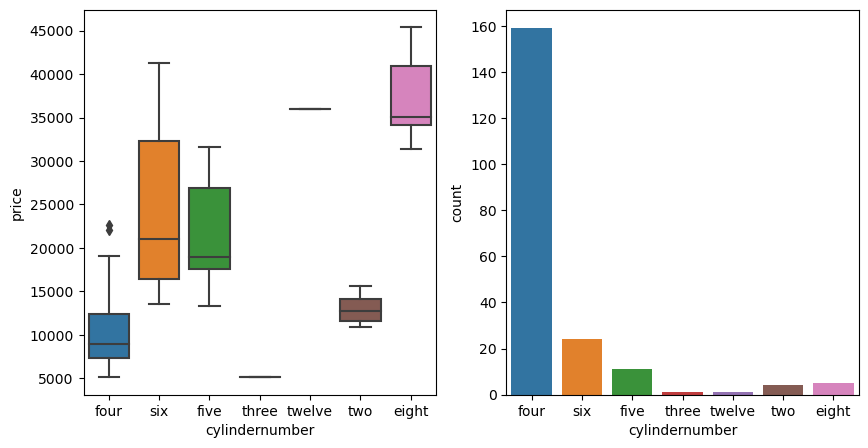

In [19]:
plt.figure(figsize=(10,5))
row,col=1,2
plt.subplot(row,col,1)
sns.boxplot(x='cylindernumber',y='price',data=df)

plt.subplot(row,col,2)
sns.countplot(x='cylindernumber',data=df)

plt.show()

### EDA on continious features

C:\Users\laksh\AppData\Local\Temp\ipykernel_16196\344052700.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: title={'center': 'Continious Features Co-relation'}>

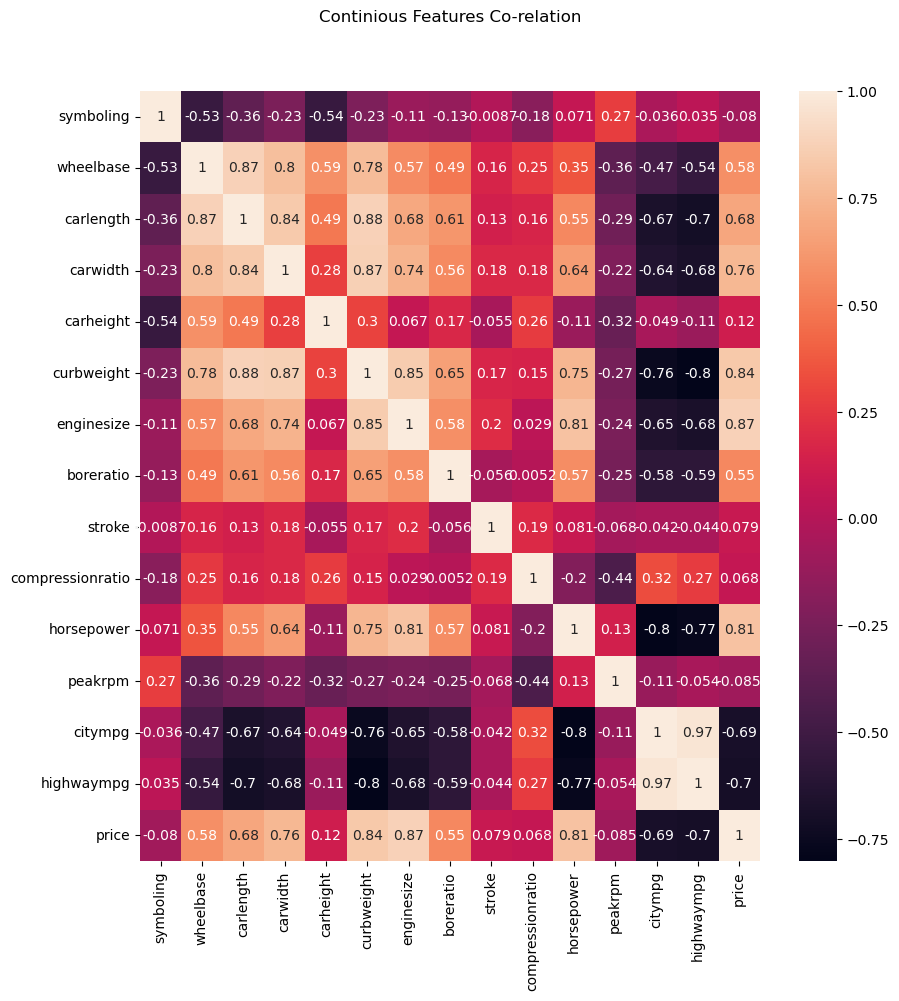

In [20]:
plt.figure(figsize=(10,10))
plt.title('Continious Features Co-relation',pad=50)
sns.heatmap(df.corr(),annot=True)

Features which are linearly related to price are <br>
enginesize = 0.87<br>
curbweight = 0.84<br>
horsepower = 0.81<br>
carwidth = 0.76<br>
carlength = 0.68<br>
wheelbase = 0.58<br>
boreratio = 0.55<br>

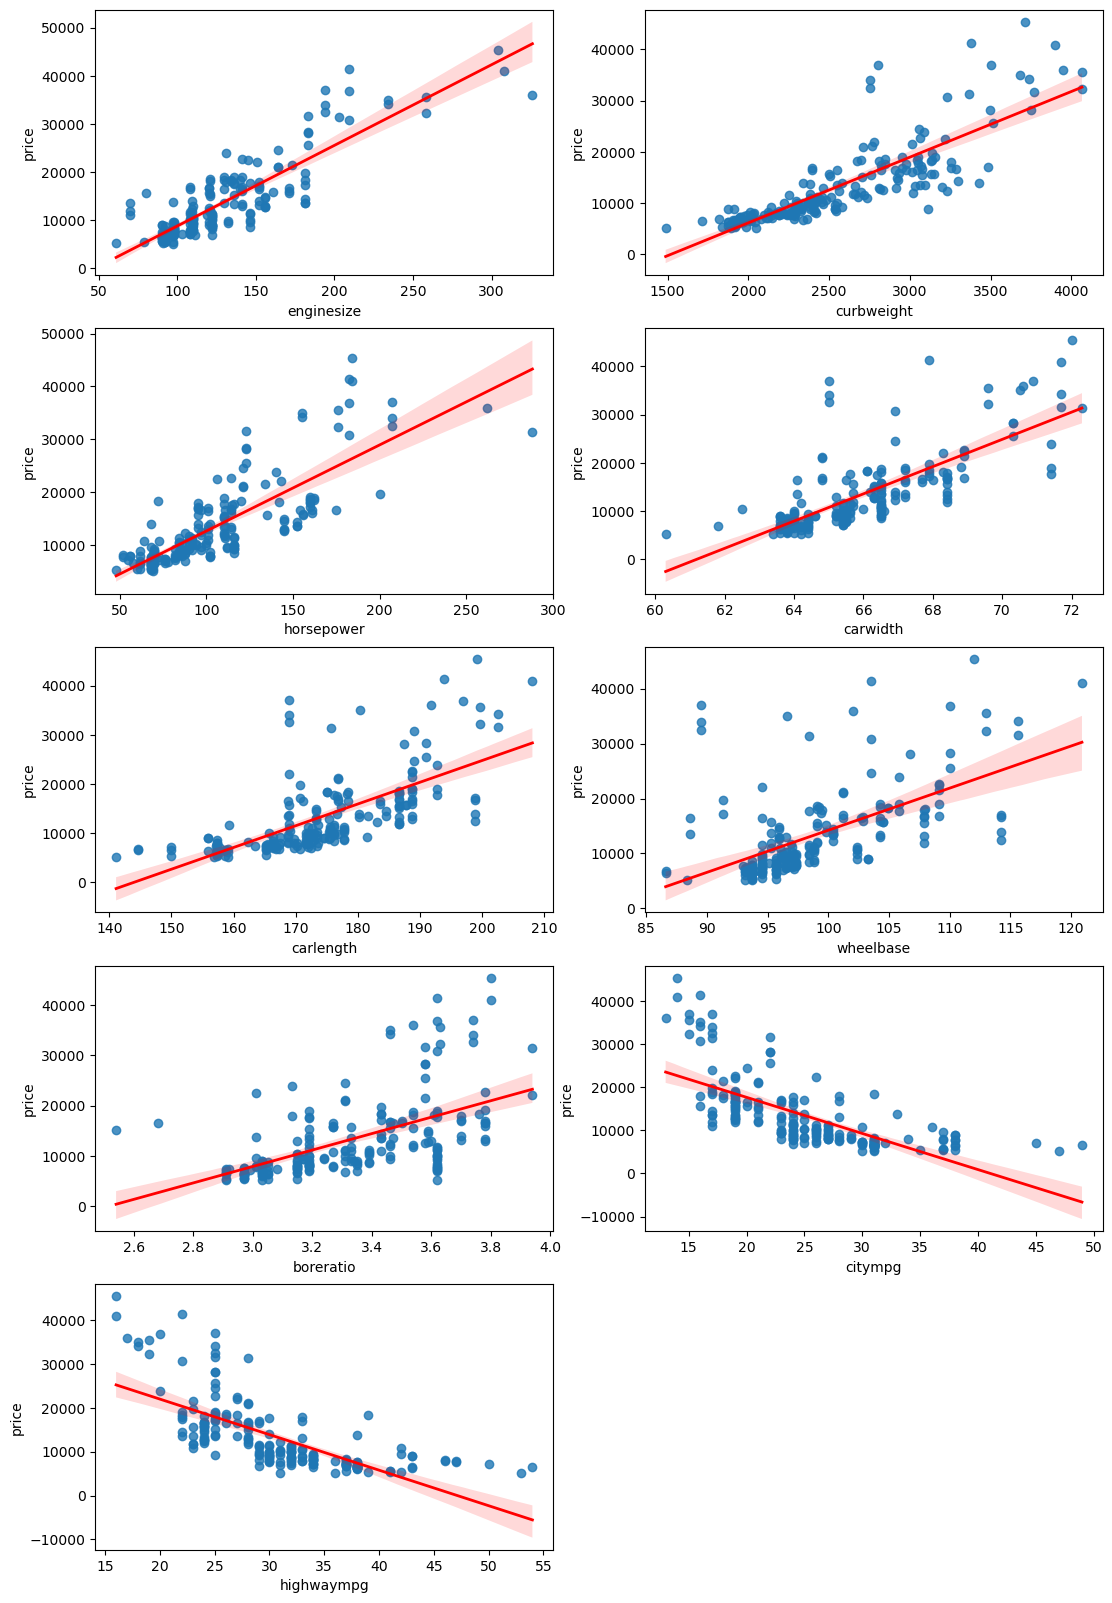

In [21]:
plt.figure(figsize=(13,20))
row=5
col=2
lst = ['enginesize','curbweight','horsepower','carwidth','carlength','wheelbase','boreratio','citympg','highwaympg']
for i in range(1,10):
    plt.subplot(row,col,i)
    sns.regplot(x=df[lst[i-1]],y=df['price'],line_kws={'color':'red','lw':2})

plt.show()

<b>Observations and Insights</b><br>
<span style='color:green'>1.citympg and highwaympg have negative relation ie as they increase prive decrease so these are immportant features</span>

# Feature Selection

### Features needed to be removed (close to 0 relation with price)
symboling<br>
carheight<br>
stroke<br>
compressionration<br>
peakrpm<br>



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [23]:
df = df.drop(['symboling','carheight','stroke','compressionratio','peakrpm'],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    object 
 12  cylindernumber  205 non-null    object 
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    object 
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  citympg         205 non-null    int

In [25]:
objects=[]
for i in df.columns:
    if type(df[i][1])==str:
        print('-'*100)
        print(i)
        print(df[i].unique())
        objects.append(i)
print(object)
le = LabelEncoder()
mapped_dictonary = {}
for i in objects:
    le.fit(df[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mapped_dictonary[i]=(le_name_mapping)
    df[i]=le.fit_transform(df[i])
print(mapped_dictonary)


----------------------------------------------------------------------------------------------------
CarName
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
----------------------------------------------------------------------------------------------------
fueltype
['gas' 'diesel']
----------------------------------------------------------------------------------------------------
aspiration
['std' 'turbo']
----------------------------------------------------------------------------------------------------
doornumber
['two' 'four']
----------------------------------------------------------------------------------------------------
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
----------------------------------------------------------------------------------------------------
drivewheel
['rwd' 'fwd' '4wd']
---

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    int32  
 1   fueltype        205 non-null    int32  
 2   aspiration      205 non-null    int32  
 3   doornumber      205 non-null    int32  
 4   carbody         205 non-null    int32  
 5   drivewheel      205 non-null    int32  
 6   enginelocation  205 non-null    int32  
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    int32  
 12  cylindernumber  205 non-null    int32  
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    int32  
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  citympg         205 non-null    int

# Data Preprocessing

In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
x.shape , y.shape

((205, 19), (205,))

In [29]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [30]:
x_train , x_test , y_train , y_test = train_test_split(scaled_x , y ,test_size=0.2,random_state=42)

# Model building and it score

In [31]:
test,train=[],[]
def model_life(model):
    model.fit(x_train,y_train)
    r2_test = r2_score(model.predict(x_test),y_test)
    r2_train = r2_score(model.predict(x_train),y_train)
    r2_test , r2_train = float("{:.2f}".format(r2_test)),float("{:.2f}".format(r2_train))
    test.append(r2_test)
    train.append(r2_train)
    print('-'*30)
    print(f'R2 test score = {r2_test}')
    print(f'R2 train score = {r2_train}')
    return model

In [32]:
models=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
model_name = ['LinearRegression',"KNeighborsRegressor",'DecisionTreeRegressor','RandomForestRegressor']

In [33]:
trained_model_list = []
for i in models:
    trained_model_list.append(model_life(i))
result = pd.DataFrame({'Models':model_name,
                       'Traning Score':train,
                       'Testing Score':test
                       })
result

------------------------------
R2 test score = 0.77
R2 train score = 0.88
------------------------------
R2 test score = 0.51
R2 train score = 0.75
------------------------------
R2 test score = 0.92
R2 train score = 1.0
------------------------------
R2 test score = 0.96
R2 train score = 0.98


,Models,Traning Score,Testing Score
0,LinearRegression,0.88,0.77
1,KNeighborsRegressor,0.75,0.51
2,DecisionTreeRegressor,1.00,0.92
3,RandomForestRegressor,0.98,0.96


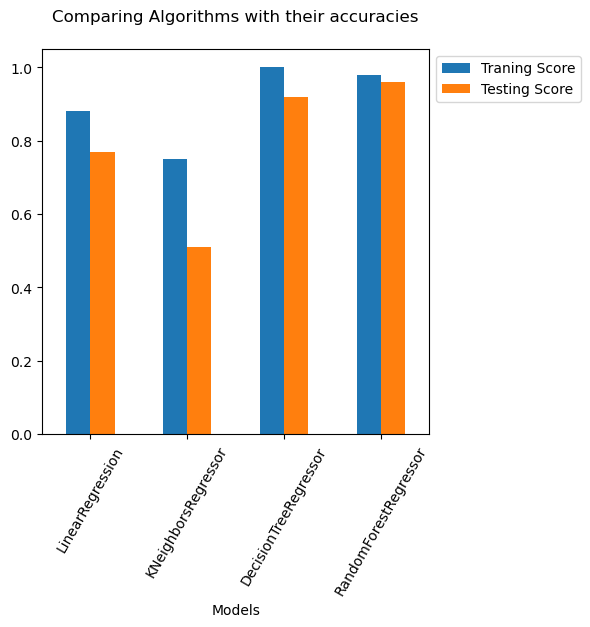

In [34]:
result.plot(
        x='Models', 
        y=['Traning Score','Testing Score'], 
        kind='bar', 
        figsize=(5,5)).legend( bbox_to_anchor =(1 ,1)
       )
plt.title('Comparing Algorithms with their accuracies',pad=20)
plt.xticks(rotation=60)
plt.show()


In [35]:
# import pprint

# # Prints the nicely formatted dictionary
# pprint.pprint(mapped_dictonary)

# # Sets 'pretty_dict_str' to the formatted string value
# pretty_dict_str = pprint.pformat(mapped_dictonary)

